In [4]:
import visual_behavior.database as db
import time
from multiprocessing import Pool
from visual_behavior.visualization.qc import data_loading as dl

%widescreen
%standard_imports
%matplotlib notebook

/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/behavior_ophys_api/behavior_ophys_nwb_api.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


imported:
	os
	pandas as pd
	numpy as np
	matplotlib.pyplot as plt


In [32]:
def get_ellipse_fit_fraction_na(ophys_session_id):
    '''get fraction of rows = NA in ellipse fit file'''
    try:
#         print('ophys_session_id: {}'.format(ophys_session_id))
        ophys_experiment_id = db.convert_id({'ophys_session_id':ophys_session_id}, 'ophys_experiment_id')
        well_known_files = db.get_well_known_files(ophys_session_id).set_index('name')
        eye_tracking_ellipses_entry = well_known_files.loc['EyeTracking Ellipses']
        eye_tracking_ellipses_path = ''.join([eye_tracking_ellipses_entry['storage_directory'], eye_tracking_ellipses_entry['filename']])
        eye_tracking_ellipses = pd.read_hdf(eye_tracking_ellipses_path, key = '/pupil')
        return {
            'ophys_session_id':ophys_session_id,
            'ophys_experiment_id':ophys_experiment_id,
            'fraction_nan':eye_tracking_ellipses['center_x'].isna().mean()
        }
    except KeyError:
        return {
            'ophys_session_id':ophys_session_id,
            'ophys_experiment_id':ophys_experiment_id,
            'fraction_nan':np.nan
        }

In [25]:
cache = dl.get_qc_cache()
experiments = cache.get_experiment_table()
ophys_session_ids = experiments['ophys_session_id'].unique()

In [33]:
%%time
with Pool(32) as pool:
    ans = pool.map(get_ellipse_fit_fraction_na, ophys_session_ids)

CPU times: user 310 ms, sys: 332 ms, total: 642 ms
Wall time: 1min 37s


In [45]:
eyetracking_summary = pd.DataFrame(ans)
eyetracking_summary['ophys_experiment_id'].fillna(0,inplace=True)
eyetracking_summary['ophys_experiment_id'] = eyetracking_summary['ophys_experiment_id'].astype(int)

<IPython.core.display.Javascript object>


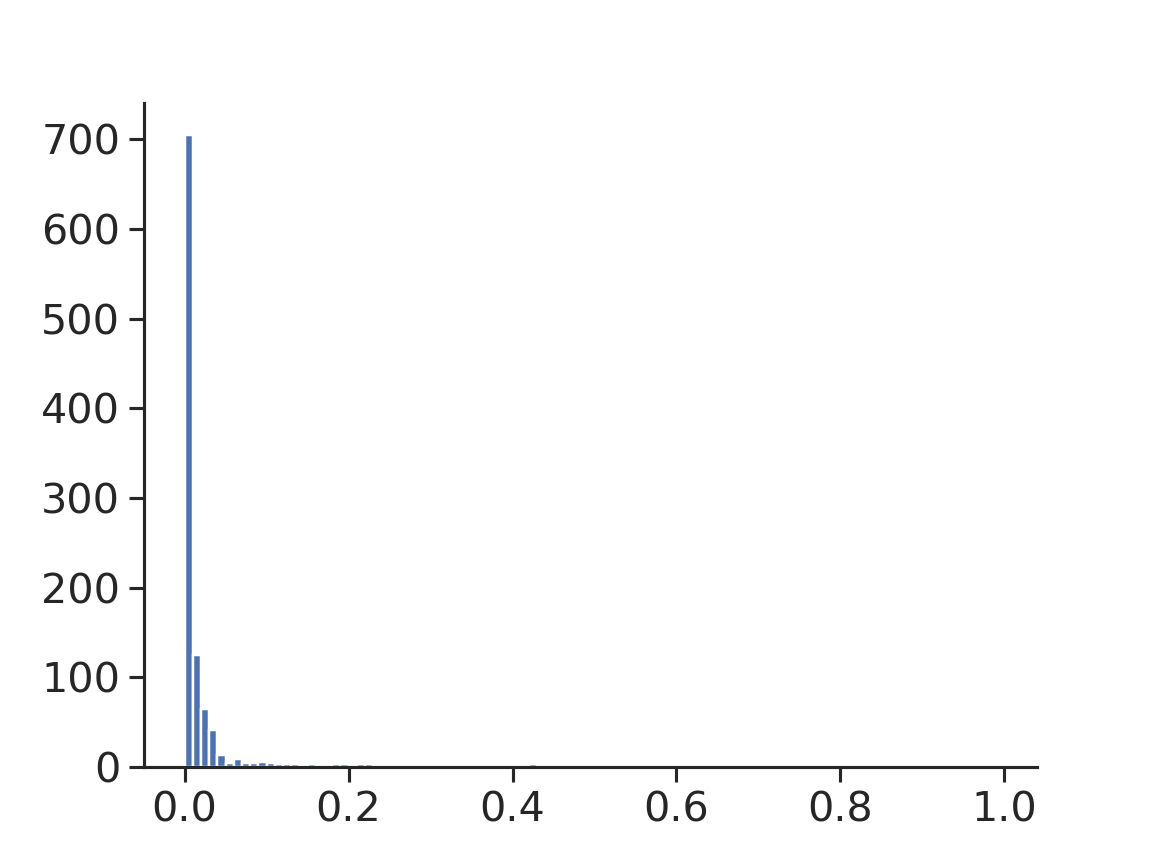

In [38]:
fig,ax=plt.subplots()
ax.hist(eyetracking_summary['fraction_nan'],bins=np.arange(0,1,0.01));

In [57]:
for frac_missing in np.arange(0.1,1,0.1):
    print("{:0.2f}% of sessions are missing at least {:0.0f}% of ellipse fits".format(
        100*(eyetracking_summary['fraction_nan']>frac_missing).mean(),
        100*frac_missing
    ))

5.13% of sessions are missing at least 10% of ellipse fits
2.65% of sessions are missing at least 20% of ellipse fits
1.50% of sessions are missing at least 30% of ellipse fits
0.97% of sessions are missing at least 40% of ellipse fits
0.71% of sessions are missing at least 50% of ellipse fits
0.53% of sessions are missing at least 60% of ellipse fits
0.53% of sessions are missing at least 70% of ellipse fits
0.44% of sessions are missing at least 80% of ellipse fits
0.35% of sessions are missing at least 90% of ellipse fits


In [46]:
eyetracking_summary.sort_values(by=['fraction_nan'],ascending=False)[:100]

,ophys_session_id,ophys_experiment_id,fraction_nan
411,963161496,963399776,1.000000
446,778879545,779327555,1.000000
447,783998900,784476477,1.000000
1089,852070825,0,1.000000
102,845235947,0,0.807640
575,889467038,0,0.782537
958,972440630,972693785,0.539597
12,869113479,869972431,0.504024
493,959003987,959324297,0.429825
1034,975452945,0,0.427715


In [47]:
eyetracking_summary.sort_values(by=['fraction_nan'],ascending=False).to_csv(
    '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/eye_tracking_NaN_summary.2020.04.08.csv',
    index=False
)